In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn import svm
from sklearn.model_selection import cross_val_score
import pickle
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier as knn
from imblearn.over_sampling import BorderlineSMOTE
import collections
from sklearn.externals import joblib
from mlxtend.plotting import plot_decision_regions

In [2]:
X_train=pd.read_excel("X_train.xlsx")
y_train=pd.read_excel("y_train.xlsx")

X_test=pd.read_excel("X_test.xlsx")
y_test=pd.read_excel("y_test.xlsx")

X_train_only_content = X_train.drop(['Para_First','Position','Length','Quote','Doc_First','FirstRel_Doc','FirstRel_Para','PageRankRel'],axis=1)
X_test_only_content = X_test.drop(['Para_First','Position','Length','Quote','Doc_First','FirstRel_Doc','FirstRel_Para','PageRankRel'],axis=1)

In [3]:
print(X_train_only_content.shape)
X_train_only_content.head()

(32615, 5)


,CentroidVar_Uni,CentroidVar_Bi,FreqWord_Uni,FreqWord_Bi,SigTerm_Uni
0,0.247286,0.345769,0.811746,1.000000,0.802003
1,0.273988,0.370171,0.803571,1.000000,0.000000
2,0.312076,0.431832,0.562169,0.916667,0.000000
3,0.264028,0.368563,0.842308,1.000000,0.802003
4,0.350765,0.481579,0.718750,1.000000,0.000000


In [4]:
sm = BorderlineSMOTE(random_state=12,sampling_strategy='minority',n_jobs=-1)
x_train_res, y_train_res = sm.fit_sample(X_train_only_content, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
collections.Counter(y_train_res)

Counter({1: 20252, 0: 20252})

In [6]:
scaler = preprocessing.MinMaxScaler()
print(scaler.fit(X_train_only_content))
X_train_only_content=scaler.transform(x_train_res)

X_test_only_content=scaler.transform(X_test_only_content)

y_train_res=np.array(y_train_res)
y_test=np.array(y_test)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [7]:
# tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
# model=GridSearchCV(svm.SVC(), tuned_parameters,  cv=5,scoring="f1",n_jobs=-1)

# # model=svm.SVC(kernel='rbf')
# model.fit(x_train_res, y_train_res)
train_scores=[]
test_scores=[]
neighbors = list(range(1,100))
for i in neighbors:
    model = knn(n_neighbors=i)
#     model.fit(x_train_res, y_train_res)
    scores_train = cross_val_score(model, X_train_only_content, y_train_res.ravel(), cv=5)
    score_mean=np.mean(scores_train)
    train_scores.append(score_mean)
    
    scores_test = cross_val_score(model, X_test_only_content, y_test.ravel(), cv=5)
    score_mean_test=np.mean(scores_test)
    test_scores.append(score_mean_test)
    

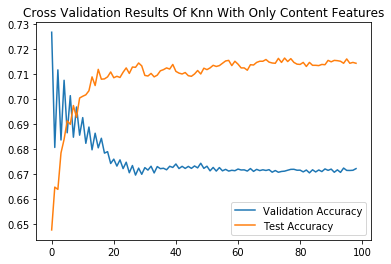

In [16]:
plt.plot(train_scores,label='Validation Accuracy')
plt.plot(test_scores,label='Test Accuracy')
plt.title("Cross Validation Results Of Knn With Only Content Features")
plt.legend()
plt.show()

In [9]:
final_model=knn(n_neighbors=75)
final_model.fit(X_train_only_content, y_train_res.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=75, p=2,
           weights='uniform')

In [12]:
y_cap = final_model.predict(X_test_only_content)

In [13]:
metrics.f1_score(y_cap,y_test)

0.6369584001975065

In [14]:
metrics.accuracy_score(y_cap,y_test)

0.6594093804284887

In [15]:
metrics.confusion_matrix(y_test,y_cap)

array([[3114, 2265],
       [ 676, 2580]], dtype=int64)